In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import awkward as ak
import os
from collections import defaultdict

In [ ]:
# train_dataset = h5py.File("/home/bapi_cms/Downloads/hgcal_electron_data_0001.h5", "r")
# # nhits = np.array(train_dataset['nhits'])
# # target_energy = np.array(train_dataset['target'])
# Rechit_z = np.array(train_dataset['rechit_z'])
# Rechit_Energy = np.array(train_dataset['rechit_energy'])
# Rechit_x = np.array(train_dataset['rechit_x'])
# Rechit_y = np.array(train_dataset['rechit_y'])

In [ ]:
# import numpy as np

# # Ensure nhits is integer type
# nhits = nhits.astype(int)

# # Compute event boundaries
# event_boundaries = np.cumsum(nhits)

# # Start index of each event
# start_indices = np.insert(event_boundaries[:-1], 0, 0)

# # Split the arrays
# energy_split = [Rechit_Energy[start:end] for start, end in zip(start_indices, event_boundaries)]
# x_split = [Rechit_x[start:end] for start, end in zip(start_indices, event_boundaries)]
# y_split = [Rechit_y[start:end] for start, end in zip(start_indices, event_boundaries)]
# z_split = [Rechit_z[start:end] for start, end in zip(start_indices, event_boundaries)]


In [ ]:
# import pandas as pd
# all_rows = []

# for event_id, (e, x, y, z) in enumerate(zip(energy_split[:100000], x_split[:100000], y_split[:100000], z_split[:10000])):
#     for i in range(len(e)):
#         all_rows.append({
#             "event": event_id,
#             "energy": e[i],
#             "x": x[i],
#             "y": y[i],
#             "z": z[i]
#         })

# df = pd.DataFrame(all_rows)
# df.to_csv("rechits_100000_events.csv", index=False)


In [ ]:
# Ensure nhits is integer type
nhits = nhits.astype(int)

# Compute event boundaries
event_boundaries = np.cumsum(nhits)
start_indices = np.insert(event_boundaries[:-1], 0, 0)

# Split rechit arrays into per-event arrays
energy_split = [Rechit_Energy[start:end] for start, end in zip(start_indices, event_boundaries)]
x_split = [Rechit_x[start:end] for start, end in zip(start_indices, event_boundaries)]
y_split = [Rechit_y[start:end] for start, end in zip(start_indices, event_boundaries)]
z_split = [Rechit_z[start:end] for start, end in zip(start_indices, event_boundaries)]

# Limit number of events
max_events = min(100000, len(energy_split))

# Flatten to rows for CSV
all_rows = []

for event_id in range(max_events):
    e_arr = energy_split[event_id]
    x_arr = x_split[event_id]
    y_arr = y_split[event_id]
    z_arr = z_split[event_id]
    
    n = nhits[event_id]
    t = target_energy[event_id]

    for i in range(len(e_arr)):
        all_rows.append({
            "event": event_id,
            "energy": e_arr[i],
            "x": x_arr[i],
            "y": y_arr[i],
            "z": z_arr[i],
            "nhits": n,
            "target_energy": t
        })

# Create DataFrame and save
df = pd.DataFrame(all_rows)
df.to_csv("rechits_100000_events.csv", index=False)


In [3]:
# Assume nhits, target_energy, Rechit_Energy, Rechit_x, Rechit_y, Rechit_z are loaded
nhits = nhits.astype(int)

event_boundaries = np.cumsum(nhits)
start_indices = np.insert(event_boundaries[:-1], 0, 0)

max_events = min(50000, len(nhits))

# Initialize empty list of rows
rows = []

for event_id in range(max_events):
    start = start_indices[event_id]
    end = event_boundaries[event_id]

    n = nhits[event_id]
    t = target_energy[event_id]

    # Append only basic columns first
    for i in range(start, end):
        rows.append({
            "event": event_id,
            "nhits": n,
            "target_energy": t,
            "energy": Rechit_Energy[i]
        })

# Step 1: Write basic file
df = pd.DataFrame(rows)
df.to_csv("rechits_partial.csv", index=False)


In [4]:
# Reload the partial file
df = pd.read_csv("rechits_partial.csv")

# Reconstruct event split
nhits = df.groupby("event").first()["nhits"].values
event_boundaries = np.cumsum(nhits)
start_indices = np.insert(event_boundaries[:-1], 0, 0)

# Append x, y, z columns one at a time
x_col = []
y_col = []
z_col = []

for start, end in zip(start_indices, event_boundaries):
    x_col.extend(Rechit_x[start:end])
    y_col.extend(Rechit_y[start:end])
    z_col.extend(Rechit_z[start:end])

# Append columns
df["x"] = x_col
df["y"] = y_col
df["z"] = z_col

# Save final version
df.to_csv("rechits_50000_events.csv", index=False)


In [2]:
df = pd.read_csv("rechits_50000_events.csv")

In [3]:
df.head()

,event,nhits,target_energy,energy,x,y,z
0,0,1115,286.60653,29.806881,-1.943527,1.122096,13.8775
1,0,1115,286.60653,1.379653,0.000000,1.122096,14.7675
2,0,1115,286.60653,5.812507,-1.943527,2.244192,14.7675
3,0,1115,286.60653,99.901855,-1.943527,1.122096,14.7675
4,0,1115,286.60653,0.766559,-2.915291,-1.683144,14.7675


In [5]:
np.array(df['target_energy'])

array([286.60653027, 286.60653027, 286.60653027, ..., 246.45306293,
       246.45306293, 246.45306293])

In [8]:
nhits.shape

(648277,)

In [15]:
Rechit_z[10:50]

array([16.78249931, 16.78249931, 16.78249931, 16.78249931, 16.78249931,
       16.78249931, 16.78249931, 16.78249931, 16.78249931, 16.78249931,
       16.78249931, 16.78249931, 16.78249931, 16.78249931, 16.78249931,
       16.78249931, 16.78249931, 17.67250061, 17.67250061, 17.67250061,
       17.67250061, 17.67250061, 17.67250061, 17.67250061, 17.67250061,
       17.67250061, 17.67250061, 17.67250061, 17.67250061, 17.67250061,
       17.67250061, 17.67250061, 17.67250061, 17.67250061, 17.67250061,
       17.67250061, 17.67250061, 17.67250061, 17.67250061, 17.67250061])

In [3]:
nhits_20_30 = nhits[(target_energy > 20) & (target_energy < 30)]


In [3]:
nhits_bins = {}
bin_edges = range(0, 351, 50)  # 0 to 350 in steps of 30

for i in range(len(bin_edges) - 1):
    low = bin_edges[i]
    high = bin_edges[i + 1]
    mask = (target_energy > low) & (target_energy < high)
    nhits_bins[f"{low}_{high}"] = nhits[mask]


In [4]:
nhits = nhits.astype(int)
rechit_start_idx = np.zeros(len(nhits), dtype=int)
rechit_start_idx[1:] = np.cumsum(nhits[:-1])
rechit_end_idx = np.cumsum(nhits)

nhits_bins_rechits = {}
nhits_bins_rechits_z = {}
bin_edges = range(0, 351, 50)

for i in range(len(bin_edges) - 1):
    low = bin_edges[i]
    high = bin_edges[i + 1]
    
    mask = (target_energy > low) & (target_energy < high)
    selected_events = np.where(mask)[0]

    rechits_in_bin = []
    rechits_z_in_bin = []
    for evt in selected_events:
        start = rechit_start_idx[evt]
        end = rechit_end_idx[evt]
        rechits_in_bin.append(Rechit_Energy[start:end])
        rechits_z_in_bin.append(Rechit_z[start:end])


    nhits_bins_rechits[f"{low}_{high}"] = rechits_in_bin
    nhits_bins_rechits_z[f"{low}_{high}"] = rechits_z_in_bin



In [ ]:
nhits_bins_rechits['0_50']

In [3]:
Rechit_E_splitted = {}
bin_edges = range(0, 351, 50)  # 0 to 350 in steps of 30

for i in range(len(bin_edges) - 1):
    low = bin_edges[i]
    high = bin_edges[i + 1]
    mask = (target_energy > low) & (target_energy < high)
    Rechit_E_splitted[f"{low}_{high}"] = Rechit_Energy[mask]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 518275904 but corresponding boolean dimension is 648277

In [4]:
nhits_bins

{'0_30': array([158., 235., 201., ..., 180., 263., 191.]),
 '30_60': array([448., 445., 424., ..., 414., 466., 443.]),
 '60_90': array([491., 562., 597., ..., 491., 513., 576.]),
 '90_120': array([532., 644., 637., ..., 666., 684., 683.]),
 '120_150': array([684., 691., 784., ..., 727., 711., 722.]),
 '150_180': array([852., 844., 930., ..., 857., 820., 929.]),
 '180_210': array([862., 879., 971., ..., 897., 881., 878.]),
 '210_240': array([1029., 1000.,  953., ..., 1010.,  993.,  974.]),
 '240_270': array([1048., 1040.,  951., ..., 1049., 1067., 1031.]),
 '270_300': array([1115., 1098., 1043., ..., 1016., 1133., 1053.]),
 '300_330': array([1161., 1172., 1169., ..., 1145., 1073., 1082.])}

In [5]:
E_center = np.arange(15, 316, 30)

In [6]:
E_center

array([ 15,  45,  75, 105, 135, 165, 195, 225, 255, 285, 315])

In [7]:
mean_nhits = []

# Ensure sorted bin order
for key in sorted(nhits_bins.keys(), key=lambda x: int(x.split('_')[0])):
    nhits_array = nhits_bins[key]
    if len(nhits_array) > 0:
        mean_nhits.append(np.mean(nhits_array))
    else:
        mean_nhits.append(np.nan)  # or 0

mean_nhits = np.array(mean_nhits)


In [8]:
mean_nhits

array([ 228.71122558,  388.41292639,  531.42530392,  646.46917316,
        744.15785808,  829.64501991,  905.93571746,  974.34436559,
       1037.33730511, 1094.9967372 , 1148.48283616])

Text(0, 0.5, 'Mean rechits')

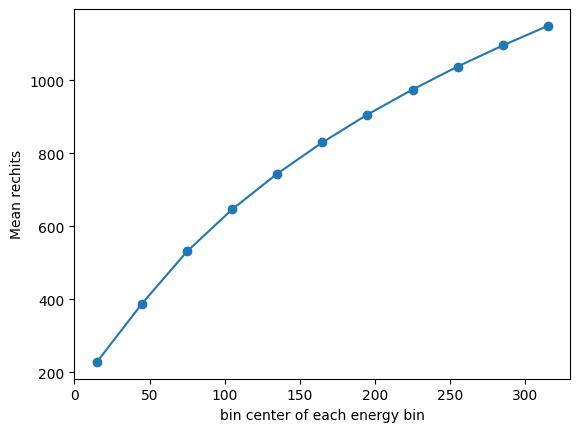

In [11]:
plt.plot(E_center, mean_nhits, marker='o')
plt.xlabel('bin center of each energy bin')
plt.ylabel('Mean rechits')

(array([4.000e+00, 6.000e+00, 6.300e+01, 1.185e+03, 5.402e+03, 7.364e+03,
        4.735e+03, 1.212e+03, 1.440e+02, 7.000e+00]),
 array([116. , 143.7, 171.4, 199.1, 226.8, 254.5, 282.2, 309.9, 337.6,
        365.3, 393. ]),
 <BarContainer object of 10 artists>)

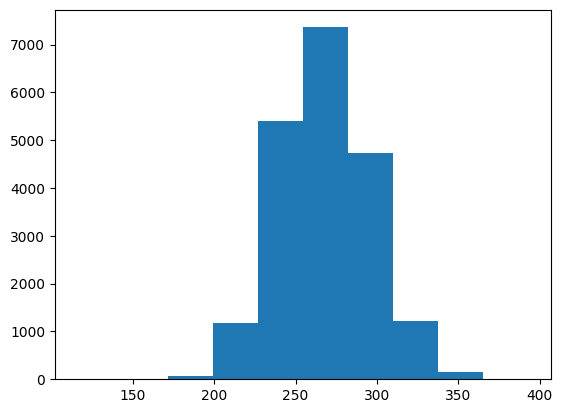

In [4]:
plt.hist(nhits_20_30)

In [3]:
df = pd.DataFrame(train_dataset)

In [5]:
# Explore the structure of the file
print("Top-level keys:", list(train_dataset.keys()))

# Suppose the file contains a group or dataset named "data"
# You can inspect what’s inside
dataset = train_dataset['nhits']  # Replace with actual dataset key
print("Dataset shape:", dataset.shape)
print("Dataset keys:", dataset.dtype.names)  # If it's a structured array

# Method 1: If dataset is a structured array
data_array = dataset[:]
df = pd.DataFrame(data_array)

# # Method 2: If each field is stored as a separate dataset in a group
# group = train_dataset['your_group_name']  # Replace accordingly
# data_dict = {key: group[key][:] for key in group.keys()}
# df = pd.DataFrame(data_dict)

# Close the file
train_dataset.close()


Top-level keys: ['nhits', 'rechit_energy', 'rechit_x', 'rechit_y', 'rechit_z', 'target']
Dataset shape: (648277,)
Dataset keys: None


In [6]:
df.head()

,0
0,1115.0
1,1048.0
2,684.0
3,491.0
4,1029.0


In [18]:
Rechit_energy = np.array(train_dataset['rechit_energy'])

In [20]:
Rechit_energy.shape

(518275904,)

In [35]:
nhits = nhits.astype(int)

In [42]:
nhits = nhits.astype(int)

# Compute cumulative indices
split_indices = np.cumsum(nhits)[:-1]

# Split flat Rechit_Energy into per-event subarrays
rechit_energy_per_event = np.split(Rechit_Energy, split_indices)

rechit_energy_sum = np.array([np.sum(e) for e in rechit_energy_per_event])


In [43]:
rechit_energy_sum.shape

(648277,)

In [45]:
Ehits_bins = {}
bin_edges = range(0, 351, 30)  # 0 to 350 in steps of 30

for i in range(len(bin_edges) - 1):
    low = bin_edges[i]
    high = bin_edges[i + 1]
    mask = (target_energy > low) & (target_energy < high)
    Ehits_bins[f"{low}_{high}"] = rechit_energy_sum[mask]

In [46]:
Ehits_bins

{'0_30': array([1136.10623068, 2022.4621473 , 1260.95780241, ..., 1551.14865035,
        2515.1353789 , 1735.3822574 ]),
 '30_60': array([5650.94714195, 5515.257348  , 5493.06025362, ..., 3616.71184367,
        5486.08448797, 5540.16602439]),
 '60_90': array([6360.79287559, 7766.99099243, 8057.06857127, ..., 7525.82335252,
        7053.68782896, 8503.28680199]),
 '90_120': array([ 8925.81439906,  9162.0104816 ,  9900.10709316, ...,
        10030.44227713, 11739.7101627 , 10740.21473122]),
 '120_150': array([11977.65477151, 12643.22654033, 12438.50943112, ...,
        12958.98757565, 12274.63305289, 12427.8078475 ]),
 '150_180': array([17055.71156067, 16468.95151001, 17425.31443328, ...,
        16003.09065324, 16469.70409799, 18151.29952097]),
 '180_210': array([19198.59075636, 16826.23996884, 20227.32751888, ...,
        18609.70749956, 18243.01738477, 18222.80351084]),
 '210_240': array([23795.17480248, 22945.9136883 , 22009.7201044 , ...,
        23224.0156064 , 22694.20197862, 2182

In [47]:
E_mean_nhits = []

# Ensure sorted bin order
for key in sorted(Ehits_bins.keys(), key=lambda x: int(x.split('_')[0])):
    Ehits_array = Ehits_bins[key]
    if len(Ehits_array) > 0:
        E_mean_nhits.append(np.mean(Ehits_array))
    else:
        E_mean_nhits.append(np.nan)  # or 0

E_mean_nhits = np.array(E_mean_nhits)

In [48]:
E_mean_nhits

array([ 1964.27116389,  4447.73104555,  7417.26031831, 10387.58472568,
       13352.53262305, 16323.31743732, 19287.99441572, 22248.70206633,
       25214.03259778, 28179.59866049, 31147.01750728])

Text(0, 0.5, 'Mean energy of sum of rechits')

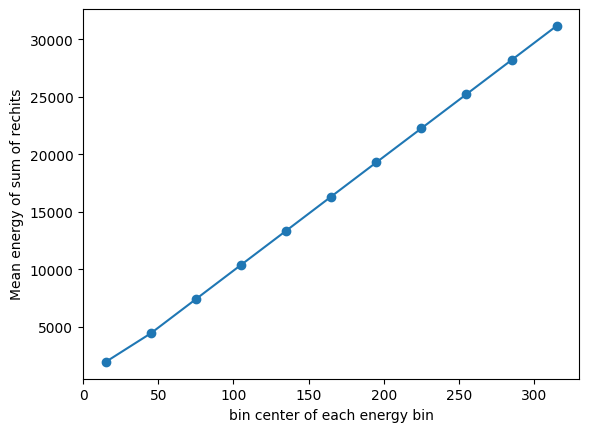

In [49]:
plt.plot(E_center, E_mean_nhits, marker='o')
plt.xlabel('bin center of each energy bin')
plt.ylabel('Mean energy of sum of rechits')

In [64]:
Rechit_Energy.shape

AttributeError: 'list' object has no attribute 'shape'

In [63]:
# Z_sorted = np.sort(Unique_Z)
# Z_sorted
# mask = Rechit_z == Z_sorted[0]
# Z_0_Rechits = Rechit_Energy[mask]
# Z
# mask
# Step 1: Get sorted unique Z values
Z_sorted = np.sort(np.unique(Rechit_z))

# Step 2: Create mask for the first Z
mask = Rechit_z == Z_sorted[0]

# Step 3: Extract energies at that Z
Z_0_Rechits = Rechit_Energy[mask]

TypeError: only integer scalar arrays can be converted to a scalar index

In [44]:
rechit_energy_sum[20:30]

array([ 6378.58226162, 19198.59075636, 28379.23752594, 13499.8059274 ,
        5515.257348  , 22009.7201044 ,  2022.4621473 , 11015.89193374,
       30745.88358867,  1260.95780241])

In [34]:
# Cumulative hit index per event
split_indices = np.cumsum(nhits)[:-1]

# # Split flat Rechit_Energy array into list of events
rechit_energy_per_event = np.split(Rechit_energy, sp lit_indices)

# # Sum energy for each event
rechit_energy_sum = np.array([np.sum(event) for event in rechit_energy_per_event])
split_indices.shape

TypeError: slice indices must be integers or None or have an __index__ method

In [9]:
#show the features of train_dataset
train_dataset.keys()

<KeysViewHDF5 ['nhits', 'rechit_energy', 'rechit_x', 'rechit_y', 'rechit_z', 'target']>

In [7]:
nhits.shape

(648277,)

In [8]:
target_energy.shape

(648277,)

In [20]:
Rechit_z.shape

(518275904,)

(array([  1718.,  33680.,  47607.,  61730.,  76396.,  93666., 111296.,
        125442.,  90958.,   5784.]),
 array([  11. ,  147.8,  284.6,  421.4,  558.2,  695. ,  831.8,  968.6,
        1105.4, 1242.2, 1379. ]),
 <BarContainer object of 10 artists>)

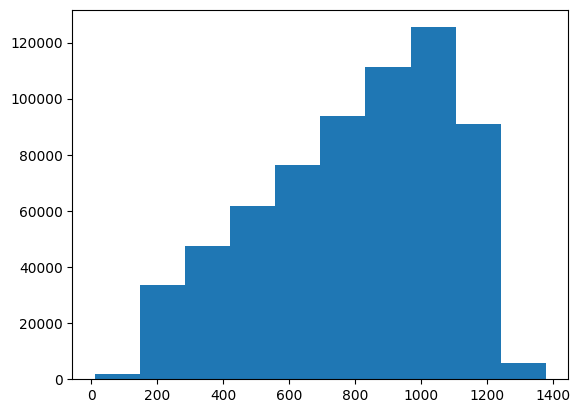

In [10]:
# plot the distribution of nhits
plt.hist(nhits)

(array([68758., 68551., 68626., 68348., 67753., 66287., 64825., 62085.,
        58499., 54545.]),
 array([ 10.00023611,  44.00020983,  78.00018355, 112.00015726,
        146.00013098, 180.0001047 , 214.00007842, 248.00005214,
        282.00002585, 315.99999957, 349.99997329]),
 <BarContainer object of 10 artists>)

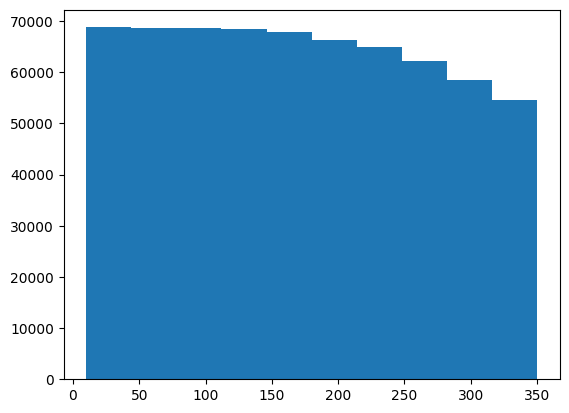

In [11]:
plt.hist(target_energy)

(array([ 2381120.,  4123784.,  7820679., 11430106., 15326031., 19870763.,
        22820333., 26189139., 28413108., 29913371., 31544208., 30630684.,
        31801693., 29797557., 30301055., 27406665., 27242715., 23756579.,
        23009583., 19277600., 18087717., 14163512., 12577586.,  9266847.,
         7872977.,  5684161.,  7566331.]),
 array([13.87749958, 14.76749992, 16.78249931, 17.67250061, 19.6875    ,
        20.57749939, 22.69249916, 23.58250046, 25.69750023, 26.58749962,
        28.70249939, 29.59250069, 31.50749969, 32.39749908, 34.3125    ,
        35.20249939, 37.11750031, 38.00749969, 39.92250061, 40.8125    ,
        42.90750122, 44.03749847, 46.41249847, 47.54249954, 49.68199921,
        50.68799973, 52.88150024, 53.9034996 ]),
 <BarContainer object of 27 artists>)

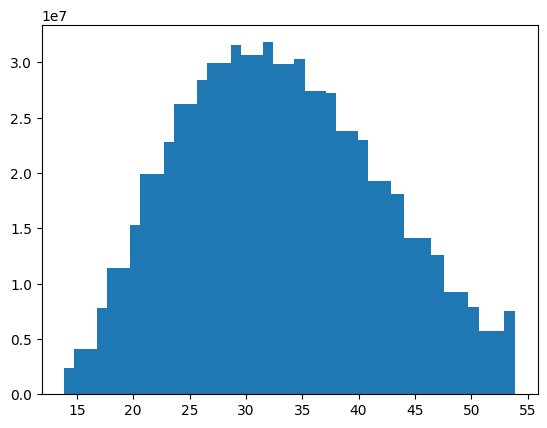

In [21]:
plt.hist(Rechit_z, bins= Unique_Z)

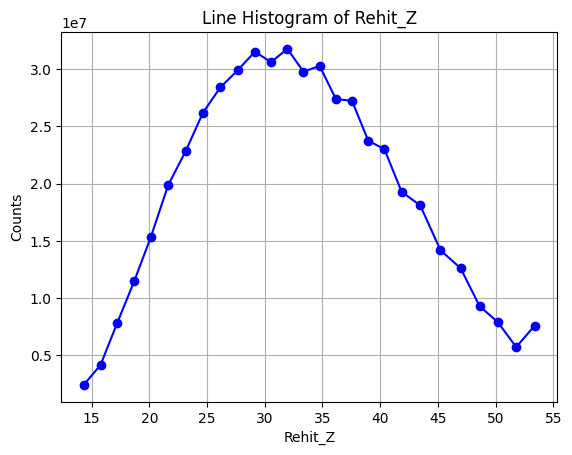

In [27]:
counts, bin_edges = np.histogram(Rechit_z, bins=Unique_Z)

# Use bin centers for x-axis
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.plot(bin_centers, counts, linestyle='-', marker='o', color='blue')
plt.title("Line Histogram of Rehit_Z")
plt.xlabel("Rehit_Z")
plt.ylabel("Counts")
plt.grid(True)
plt.show()


In [5]:
Unique_Z = np.unique(Rechit_z)
# plt.hist(Unique_Z)
Sorted_Z = np.sort(Unique_Z)

# plt.hist(Unique_Z, bins='auto', edgecolor='black')

In [11]:
Rechit_Energy.shape

(518275904,)

In [3]:
nhits = nhits.astype(int)  # ensure it's integer type
event_boundaries = np.cumsum(nhits)[:-1]
rechits_eventwise = np.split(Rechit_Energy, event_boundaries)
rechits_z_eventwise = np.split(Rechit_z, event_boundaries)
# rechits_eventwise = np.array(rechits_eventwise)


In [13]:
nhits_splitted = nhits_bins['0_50'].astype(int)  # ensure it's integer type
event_boundaries = np.cumsum(nhits_splitted)[:-1]
# rechits_eventwise = np.split(nhits_bins_rechits['0_50'], event_boundaries)
# rechits_z_eventwise = np.split(nhits_bins_rechits_z['0_50'], event_boundaries)

In [10]:
nhits_splitted.shape

(80722,)

In [11]:
event_boundaries.shape

(80721,)

In [14]:
len(nhits_bins_rechits['0_50'])

80722

In [27]:
rechits_z_eventwise[0].shape

(1115,)

In [21]:
rechits_eventwise[0].shape

(1115,)

In [ ]:
Rechit_Energy_0 = Rechit_Energy

In [15]:
Rechits_Z0 = rechits_eventwise[0][rechits_z_eventwise[0] == Sorted_Z[2] ]

In [16]:
# for i in range(len(rechits_eventwise))
Rechits_Z0

array([  5.80466938,   1.50848567,   2.06744814,  12.47461224,
         7.08472633,   3.45774794,  13.37252617,  44.81483841,
       356.48944092,   5.47472954,   2.46843076,  50.40968323,
        13.75503826,   4.86979294,   9.30892277,  13.49450588,
         2.59037685,   2.51314092])

In [ ]:
Rechits_Z0_sum = []
for i in range(len(nhits)):
    Rechits_Z0_sum.append(np.sum(rechits_eventwise[i][rechits_z_eventwise[i] == Sorted_Z[0] ]))
Rechits_Z0_sum = np.array(Rechits_Z0_sum)

In [15]:
Unique_Z = np.unique(nhits_bins_rechits_z['0_50'])
# plt.hist(Unique_Z)
Sorted_Z = np.sort(Unique_Z)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (80722,) + inhomogeneous part.

In [17]:
num_events = len(nhits_bins_rechits['0_50'])
num_z = len(Sorted_Z)

rechits_per_z_per_event = np.zeros((num_z, num_events))

for z_idx, z_val in enumerate(Sorted_Z):
    for evt in range(num_events):
        mask = nhits_bins_rechits_z['0_50'][evt] == z_val
        rechits_per_z_per_event[z_idx, evt] = np.sum(nhits_bins_rechits['0_50'][evt][mask])


In [21]:
rechits_z_energy_by_bin = {}  # Final output dict: bin_key → (Z × event) array

for bin_key in nhits_bins_rechits:
    energy_events = nhits_bins_rechits[bin_key]
    z_events = nhits_bins_rechits_z[bin_key]

    num_events = len(energy_events)
    num_z = len(Sorted_Z)

    # Initialize 2D array: Z × events
    rechits_per_z_per_event = np.zeros((num_z, num_events))

    # Loop over Z layers and events
    for z_idx, z_val in enumerate(Sorted_Z):
        for evt in range(num_events):
            mask = z_events[evt] == z_val
            rechits_per_z_per_event[z_idx, evt] = np.sum(energy_events[evt][mask])

    rechits_z_energy_by_bin[bin_key] = rechits_per_z_per_event


In [18]:
rechits_per_z_per_event.shape

(28, 80722)

In [19]:
mean_energy_per_z = np.mean(rechits_per_z_per_event, axis=1)


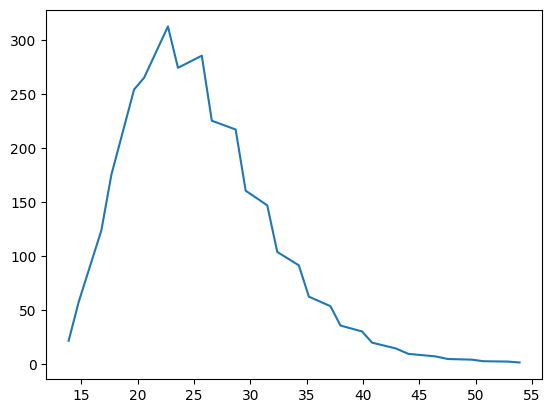

In [20]:
plt.plot(Sorted_Z, mean_energy_per_z)

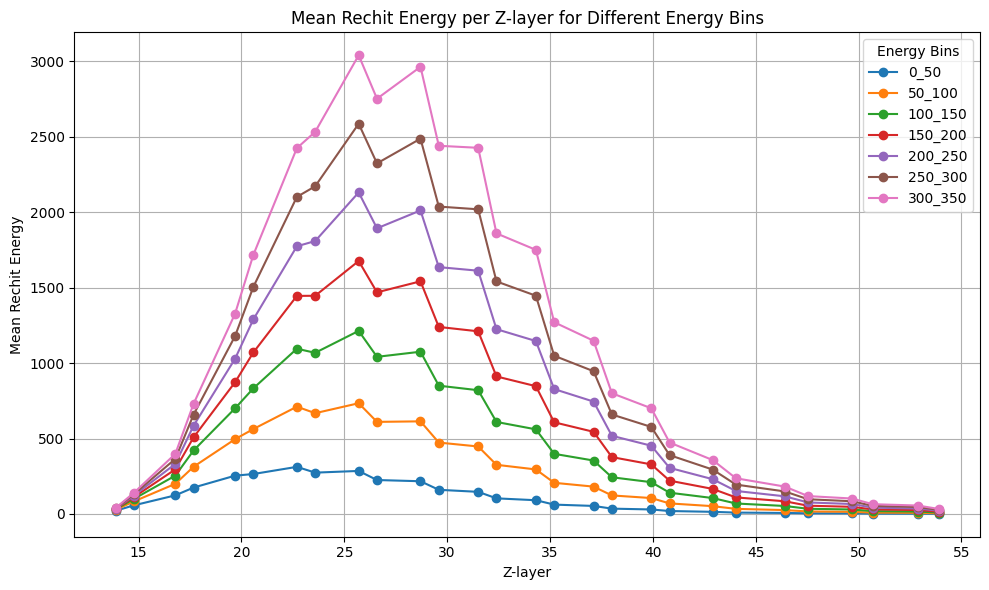

In [23]:
# import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for bin_key, z_event_matrix in rechits_z_energy_by_bin.items():
    # Compute mean over events (axis=1) for each Z-layer
    mean_energy_per_z = np.mean(z_event_matrix, axis=1)
    
    # Plot curve for this bin
    plt.plot(Sorted_Z, mean_energy_per_z, label=bin_key, marker = 'o')

plt.xlabel("Z-layer")
plt.ylabel("Mean Rechit Energy")
plt.title("Mean Rechit Energy per Z-layer for Different Energy Bins")
plt.legend(title="Energy Bins")
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
Rechits_Z0_sum.shape

(648277,)

(array([6.31423e+05, 1.66470e+04, 1.48000e+02, 2.90000e+01, 1.20000e+01,
        7.00000e+00, 4.00000e+00, 4.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([  0.        ,  84.05762167, 168.11524334, 252.17286501,
        336.23048668, 420.28810835, 504.34573002, 588.40335169,
        672.46097336, 756.51859503, 840.5762167 ]),
 <BarContainer object of 10 artists>)

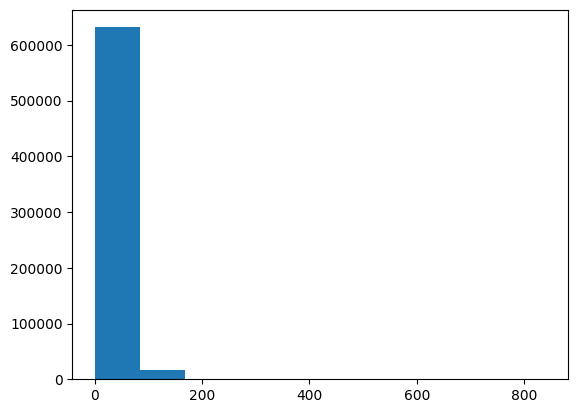

In [20]:
plt.hist(Rechits_Z0_sum)

In [29]:
# Ensure nhits is integer
nhits = nhits.astype(int)

# Get event boundaries
event_boundaries = np.cumsum(nhits)[:-1]
energy_eventwise = np.split(Rechit_Energy, event_boundaries)
z_eventwise = np.split(Rechit_z, event_boundaries)

# Output: a list of dicts. Each dict maps Z -> sum of energies
energy_sum_by_z_per_event = []

for energy_event, z_event in zip(energy_eventwise, z_eventwise):
    z_energy_sum = defaultdict(float)
    for z, e in zip(z_event, energy_event):
        z_energy_sum[z] += e
    energy_sum_by_z_per_event.append(dict(z_energy_sum))

In [ ]:
energy_sum_by_z_per_event

In [9]:
# Step 1: Build event IDs
nhits = nhits.astype(int)
# event_ids = np.repeat(np.arange(len(nhits)), nhits)
event_ids = np.repeat(np.arange(len(nhits)), nhits)

# Step 2: Create DataFrame
df = pd.DataFrame({
    'event': event_ids,
    'z': Rechit_z,
    'energy': Rechit_Energy
})

# Step 3: Pivot table — rows: Z, columns: Event, values: sum of energies
z_event_energy = df.pivot_table(index='z', columns='event', values='energy', aggfunc='sum', fill_value=0)

# Optional: convert to NumPy array if needed
z_event_matrix = z_event_energy.to_numpy()
z_values = z_event_energy.index.to_numpy()
event_ids = z_event_energy.columns.to_numpy()


KeyboardInterrupt: 

In [8]:
nhits = nhits.astype(int)
event_ids = np.repeat(np.arange(len(nhits)), nhits)
# event_ids = np.repeat(np.arange(len(nhits)), nhits)

In [25]:
Rechits_Z0

array([29.80688095])

In [9]:
Rechits_Z0.shape

(2381120,)

(array([5.11167545e+08, 4.18135300e+06, 1.62878700e+06, 8.02603000e+05,
        3.59712000e+05, 1.15011000e+05, 1.96620000e+04, 1.21700000e+03,
        1.30000000e+01, 1.00000000e+00]),
 array([5.00000000e-01, 2.88460522e+02, 5.76421045e+02, 8.64381567e+02,
        1.15234209e+03, 1.44030261e+03, 1.72826313e+03, 2.01622366e+03,
        2.30418418e+03, 2.59214470e+03, 2.88010522e+03]),
 <BarContainer object of 10 artists>)

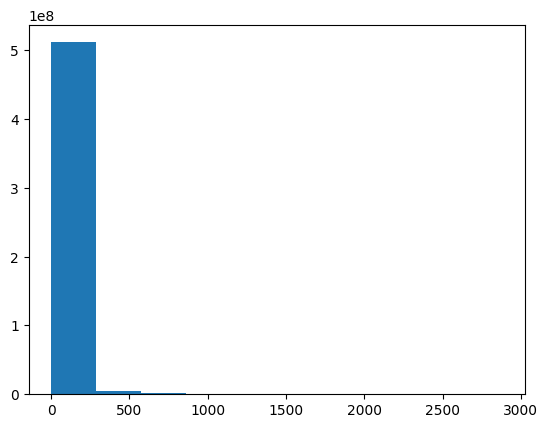

In [15]:
# Split the data in the 30 GeV bins
plt.hist(Rechit_energy)

In [16]:
# Define 30 GeV bins from min to max
min_energy = target_energy.min()
max_energy = target_energy.max()
bins = np.arange(min_energy, max_energy + 30, 30)

# Assign each event to a bin
bin_indices = np.digitize(target_energy, bins)

# Split nhits based on bins
nhits_binned = {}
for i in range(1, len(bins)):
    mask = bin_indices == i
    nhits_binned[f"{bins[i-1]}–{bins[i]} GeV"] = nhits[mask]

# Print stats for each bin
for bin_label, nhits_array in nhits_binned.items():
    print(f"{bin_label}: count = {len(nhits_array)}, mean nhits = {np.mean(nhits_array):.2f}")


10.000236109683389–40.000236109683385 GeV: count = 60668, mean nhits = 263.55
40.000236109683385–70.00023610968339 GeV: count = 60623, mean nhits = 440.40
70.00023610968339–100.00023610968337 GeV: count = 60374, mean nhits = 572.44
100.00023610968337–130.00023610968339 GeV: count = 60582, mean nhits = 680.63
130.00023610968339–160.00023610968336 GeV: count = 60049, mean nhits = 774.09
160.00023610968336–190.00023610968336 GeV: count = 59447, mean nhits = 855.98
190.00023610968336–220.00023610968336 GeV: count = 58377, mean nhits = 929.75
220.00023610968336–250.00023610968336 GeV: count = 56759, mean nhits = 995.72
250.00023610968336–280.0002361096833 GeV: count = 54870, mean nhits = 1057.52
280.0002361096833–310.0002361096833 GeV: count = 51812, mean nhits = 1112.90
310.0002361096833–340.0002361096833 GeV: count = 49287, mean nhits = 1165.51
340.0002361096833–370.0002361096833 GeV: count = 15429, mean nhits = 1199.05


In [18]:

# Create output directory
output_dir = "nhits_by_energy_bin"
os.makedirs(output_dir, exist_ok=True)

# Save each bin
for i in range(1, len(bins)):
    mask = bin_indices == i
    nhits_bin = nhits[mask]
    
    bin_label = f"{int(bins[i-1])}_{int(bins[i])}GeV"
    filename = os.path.join(output_dir, f"nhits_{bin_label}.npy")
    
    np.save(filename, nhits_bin)


In [ ]:
# calculate the mean of the rechits distribution
output_file = "/nhits_by_energy_bin"

with h5py.File(output_file, "w") as h5f:
    for i in range(1, len(bins)):
        mask = bin_indices == i
        nhits_bin = nhits[mask]
        
        bin_label = f"{int(bins[i-1])}_{int(bins[i])}GeV"
        h5f.create_dataset(bin_label, data=nhits_bin)


In [25]:
# Folder containing the .npy files
folder_path = "/home/bapi_cms/Desktop/ML4HEP/Workshop/nhits_by_energy_bin"  # change to your actual path

# Dictionary to store mean values
mean_rechits_per_bin = {}

# Loop through all .npy files
for filename in sorted(os.listdir(folder_path)):
    if filename.endswith(".npy"):
        filepath = os.path.join(folder_path, filename)

        # Load rechits array
        rechits = np.load(filepath)  # shape: (N_events, N_hits) or (N_hits,) if flattened

        # Compute mean
        mean_value = rechits.mean()

        # Extract bin label from filename (e.g., "rechits_0_30GeV.npy" -> "0–30 GeV")
        bin_label = filename.replace("rechits_", "").replace(".npy", "").replace("_", "–")

        # Store the result
        mean_rechits_per_bin[bin_label] = mean_value

# Print the results
for bin_label, mean_val in mean_rechits_per_bin.items():
    print(f"{bin_label}: mean rechits = {mean_val:.4f}")


nhits–100–130GeV: mean rechits = 680.6326
nhits–10–40GeV: mean rechits = 263.5495
nhits–130–160GeV: mean rechits = 774.0943
nhits–160–190GeV: mean rechits = 855.9848
nhits–190–220GeV: mean rechits = 929.7467
nhits–220–250GeV: mean rechits = 995.7181
nhits–250–280GeV: mean rechits = 1057.5227
nhits–280–310GeV: mean rechits = 1112.8994
nhits–310–340GeV: mean rechits = 1165.5123
nhits–340–370GeV: mean rechits = 1199.0467
nhits–40–70GeV: mean rechits = 440.4042
nhits–70–100GeV: mean rechits = 572.4413


In [4]:
df.head()

,0
0,nhits
1,rechit_energy
2,rechit_x
3,rechit_y
4,rechit_z


In [5]:
print("Number of columns:", len(df.columns))
print("Column names:")
print(df.columns.tolist())
for col in df.columns:
    print(col)
    

Number of columns: 1
Column names:
[0]
0


In [9]:
# from scipy.spatial import cKDTree
# import numpy as np

# # e1_over_e7_by_bin = {}

# # for bin_key in nhits_bins_rechits_energy:
# # E_list = Rechit_Energy
# # Z_list = Rechit_z
# # X_list = Rechit_x
# # Y_list = Rechit_y

# nhits = np.array(df['nhits'])
# n_unique = np.unique(nhits)



# Rechit_Energy = np.array(df['energy'])
# Rechit_z = np.array(df['z'])
# Rechit_x = np.array(df['x'])
# Rechit_y = np.array(df['y'])

# Unique_Z = np.unique(Rechit_z)
# # plt.hist(Unique_Z)
# Sorted_Z = np.sort(Unique_Z)

# num_events = len(n_unique)
# num_z = len(Sorted_Z)
# e1_over_e7 = np.zeros((num_z, num_events))

# for evt in range(num_events):
#     E_evt = Rechit_Energy[evt]
#     Z_evt = Rechit_z[evt]
#     X_evt = Rechit_x[evt]
#     Y_evt = Rechit_y[evt]

#     for z_idx, z_val in enumerate(Sorted_Z):
#         mask = Z_evt == z_val
#         if not np.any(mask):
#             e1_over_e7[z_idx, evt] = 0.0
#             continue

#         e_z = E_evt[mask]
#         x_z = X_evt[mask]
#         y_z = Y_evt[mask]

#         # Seed: rechit with max energy
#         seed_idx = np.argmax(e_z)
#         seed_pos = np.array([x_z[seed_idx], y_z[seed_idx]])
#         seed_E = e_z[seed_idx]

#         # Build KD-tree to find 6 nearest neighbors (excluding self)
#         tree = cKDTree(np.vstack([x_z, y_z]).T)
#         dists, indices = tree.query(seed_pos, k=min(7, len(e_z)))  # E1 + 6 neighbors

#         E7 = np.sum(e_z[indices])
#         e1_over_e7[z_idx, evt] = seed_E / E7 if E7 != 0 else 0.0
#         print('evt:',evt)
#         print('E_1/E_7:', seed_E / E7)

#     # e1_over_e7_by_bin[bin_key] = e1_over_e7


In [ ]:
from scipy.spatial import cKDTree
import numpy as np
import pandas as pd

# Assume df is already loaded
Sorted_Z = np.sort(df['z'].unique())
num_z = len(Sorted_Z)
num_events = df['event'].nunique()

# Preallocate result array
e1_over_e7 = np.zeros((num_z, num_events))

# Group by event
grouped = df.groupby("event")

# Loop over events
for evt_id, event_df in grouped:
    E_evt = event_df["energy"].values
    X_evt = event_df["x"].values
    Y_evt = event_df["y"].values
    Z_evt = event_df["z"].values

    for z_idx, z_val in enumerate(Sorted_Z):
        mask = Z_evt == z_val
        if not np.any(mask):
            e1_over_e7[z_idx, evt_id] = 0.0
            continue

        e_z = E_evt[mask]
        x_z = X_evt[mask]
        y_z = Y_evt[mask]

        seed_idx = np.argmax(e_z)
        seed_pos = np.array([x_z[seed_idx], y_z[seed_idx]])
        seed_E = e_z[seed_idx]

        tree = cKDTree(np.vstack([x_z, y_z]).T)
        k = min(7, len(e_z))  # Seed + 6 neighbors
        dists, indices = tree.query(seed_pos, k=k)

        E7 = np.sum(e_z[indices])
        ratio = seed_E / E7 if E7 != 0 else 0.0
        e1_over_e7[z_idx, evt_id] = ratio
        print('evt_id: ',evt_id)
        print('ratio: ',ratio)


In [13]:
e1_over_e7.shape

(28, 50000)

(array([  64.,    0.,  309., 2047., 4604., 6987., 8210., 9155., 8717.,
        9907.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

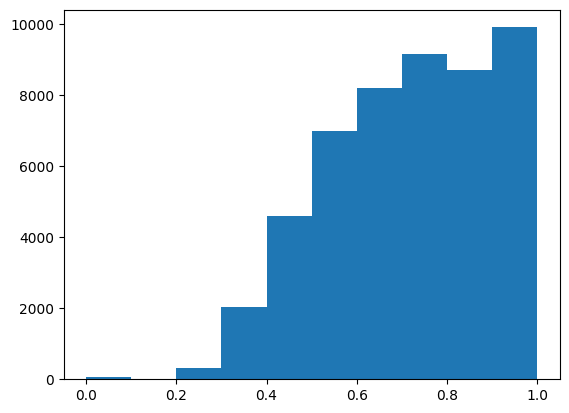

In [14]:
plt.hist(e1_over_e7[0])

(array([6.0000e+00, 0.0000e+00, 1.1100e+02, 1.3970e+03, 5.2850e+03,
        8.8330e+03, 1.3923e+04, 1.5037e+04, 5.1390e+03, 2.6900e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

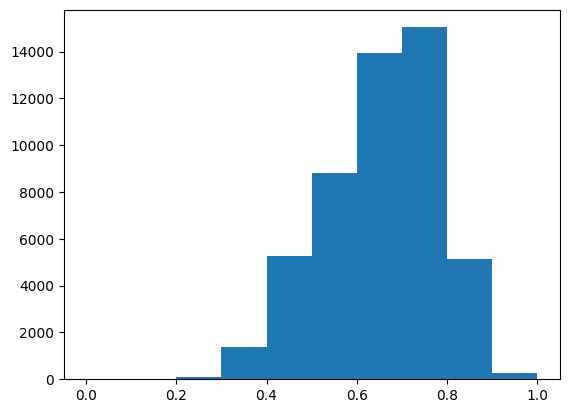

In [15]:
plt.hist(e1_over_e7[2])

(array([  682.,   136., 13384., 21487.,  8998.,  2950.,   939.,   364.,
          167.,   893.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

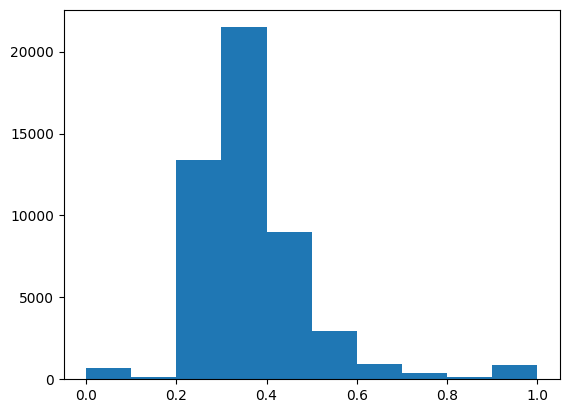

In [16]:
plt.hist(e1_over_e7[20])

(array([ 3478.,    97.,  8574., 16585., 10120.,  4822.,  2008.,  1001.,
          483.,  2832.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

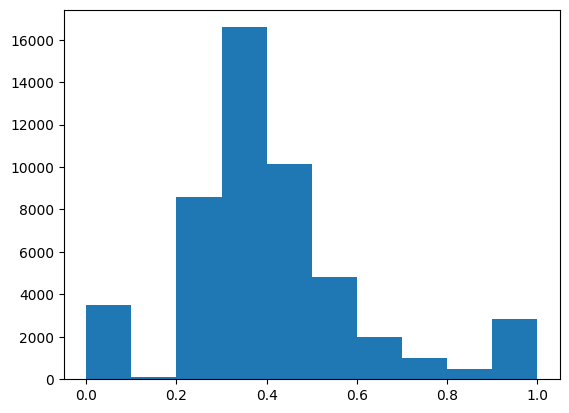

In [23]:
plt.hist(e1_over_e7[24])

In [ ]:
from scipy.spatial import cKDTree
import numpy as np
import pandas as pd

# Assume df is already loaded
Sorted_Z = np.sort(df['z'].unique())
num_z = len(Sorted_Z)
num_events = df['event'].nunique()

# Preallocate result array
e7_over_e19 = np.zeros((num_z, num_events))

# Group by event
grouped = df.groupby("event")

for evt_id, event_df in grouped:
    E_evt = event_df["energy"].values
    X_evt = event_df["x"].values
    Y_evt = event_df["y"].values
    Z_evt = event_df["z"].values

    for z_idx, z_val in enumerate(Sorted_Z):
        mask = Z_evt == z_val
        if not np.any(mask):
            e7_over_e19[z_idx, evt_id] = 0.0
            continue

        e_z = E_evt[mask]
        x_z = X_evt[mask]
        y_z = Y_evt[mask]

        seed_idx = np.argmax(e_z)
        seed_pos = np.array([x_z[seed_idx], y_z[seed_idx]])

        tree = cKDTree(np.vstack([x_z, y_z]).T)
        k_e7 = min(7, len(e_z))      # E7: seed + 6 neighbors
        k_e19 = min(19, len(e_z))    # E19: seed + 18 neighbors

        _, idx_e7 = tree.query(seed_pos, k=k_e7)
        _, idx_e19 = tree.query(seed_pos, k=k_e19)

        E7 = np.sum(e_z[idx_e7])
        E19 = np.sum(e_z[idx_e19])

        ratio = E7 / E19 if E19 != 0 else 0.0
        e7_over_e19[z_idx, evt_id] = ratio

        # Optional debug
        print(f"evt_id: {evt_id}, z_idx: {z_idx}, E7: {E7:.2f}, E19: {E19:.2f}, ratio: {ratio:.4f}")


(array([6.4000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.0000e+00, 4.0000e+01, 1.3400e+02, 4.4100e+02, 4.9315e+04]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

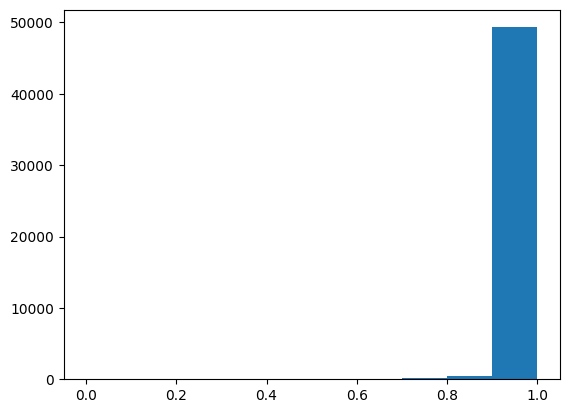

In [18]:
plt.hist(e7_over_e19[0])

(array([5.0000e+00, 2.6000e+01, 9.6000e+01, 2.5700e+02, 6.3200e+02,
        1.5670e+03, 5.4410e+03, 2.8336e+04, 1.3523e+04, 1.1700e+02]),
 array([0.26016883, 0.33415195, 0.40813507, 0.48211818, 0.5561013 ,
        0.63008442, 0.70406753, 0.77805065, 0.85203377, 0.92601688,
        1.        ]),
 <BarContainer object of 10 artists>)

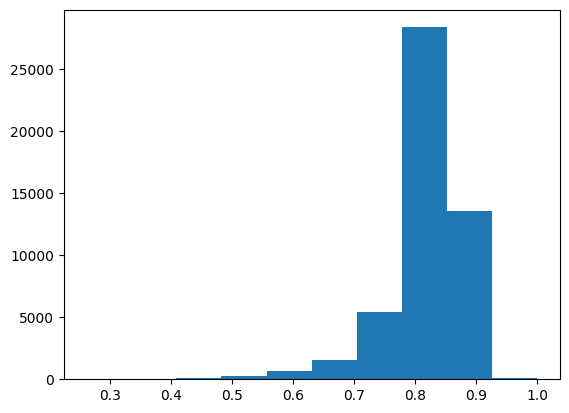

In [26]:
plt.hist(e7_over_e19[10])

(array([  682.,     0.,   110.,  1880.,  6833., 12201., 13703.,  6901.,
         1430.,  6260.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

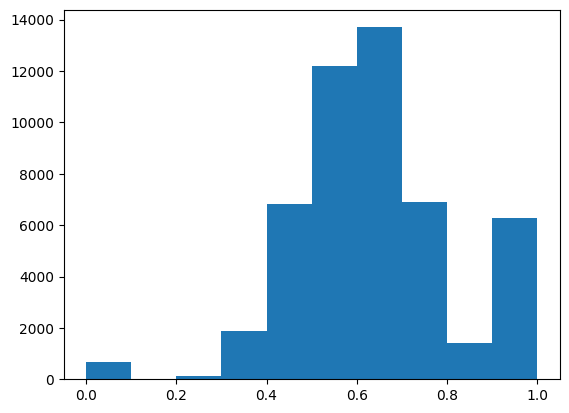

In [19]:
plt.hist(e7_over_e19[20])

(array([1.6470e+03, 1.0000e+00, 1.3700e+02, 2.7330e+03, 9.0730e+03,
        1.1994e+04, 8.4160e+03, 3.8120e+03, 1.7210e+03, 1.0466e+04]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

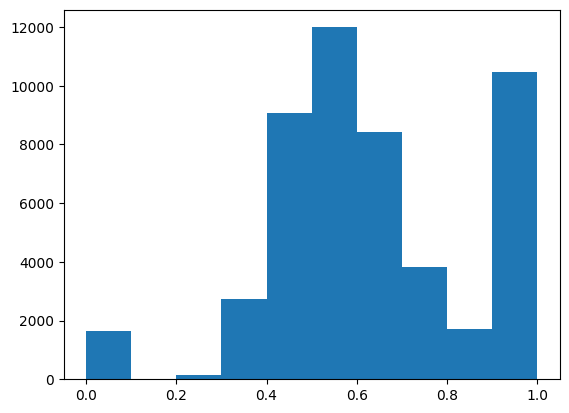

In [22]:
plt.hist(e7_over_e19[22])

In [33]:
np.savez("rechit_energy_ratios.npz", 
         z_energy_sum = z_energy_sum,
         e1_over_e7=e1_over_e7, 
         e7_over_e19=e7_over_e19)


In [28]:
import numpy as np
import pandas as pd

# Sorted unique Z positions
Sorted_Z = np.sort(df['z'].unique())
num_z = len(Sorted_Z)
num_events = df['event'].nunique()

# Preallocate array to hold energy sums: shape (Z_planes, Events)
z_energy_sum = np.zeros((num_z, num_events))

# Map Z to index
z_to_index = {z: i for i, z in enumerate(Sorted_Z)}

# Group by event
grouped = df.groupby("event")

for evt_id, event_df in grouped:
    Z_evt = event_df["z"].values
    E_evt = event_df["energy"].values

    for z_val, e_val in zip(Z_evt, E_evt):
        z_idx = z_to_index[z_val]
        z_energy_sum[z_idx, evt_id] += e_val


In [30]:
z_energy_sum.shape

(28, 50000)

In [31]:
mean_z_energy_sum = np.mean(z_energy_sum, axis=1)

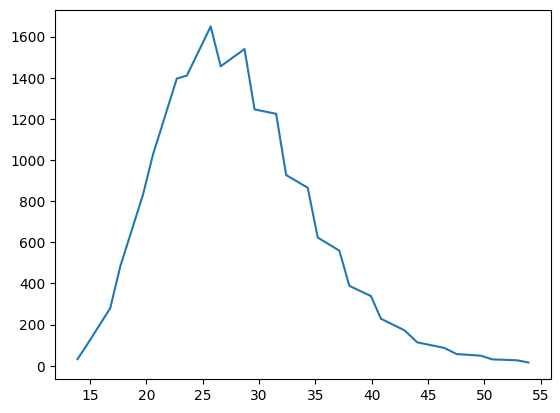

In [32]:
plt.plot(Sorted_Z, mean_z_energy_sum)